In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Credit_Risk_XTrain.csv')
test = pd.read_csv('Credit_Risk_Test_data.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape , test.shape

((614, 13), (367, 12))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train["data"] = 'train'
test["data"] = 'test'

In [9]:
data = pd.concat([train , test] , axis = 0)

In [10]:
data.shape

(981, 14)

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [12]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN,test


In [13]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

In [14]:
data.isnull().sum() / len(data) * 100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
data                  0.000000
dtype: float64

In [15]:
# Gender - object
# Married - object
# Dependents - object
# Self_Employed - object
# LoanAmount - float64
# Loan_Amount_Term - float64
# Credit_History - float64

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  data               981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


# Treating Categorical variable

In [16]:
data['Gender'].value_counts()

Gender
Male      775
Female    182
Name: count, dtype: int64

In [17]:
data['Gender'] = data['Gender'].fillna('Male')

In [18]:
data['Married'].value_counts()

Married
Yes    631
No     347
Name: count, dtype: int64

In [19]:
data['Married'] = data['Married'].fillna('Yes')

In [20]:
data['Dependents'].value_counts()

Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64

In [21]:
data['Dependents'] = data['Dependents'].fillna('0')

In [22]:
data['Self_Employed'].value_counts()

Self_Employed
No     807
Yes    119
Name: count, dtype: int64

In [23]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')

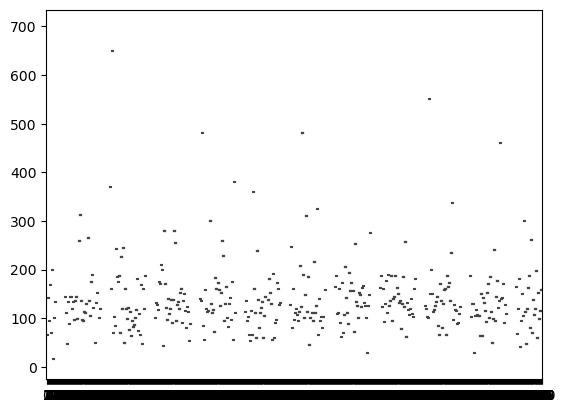

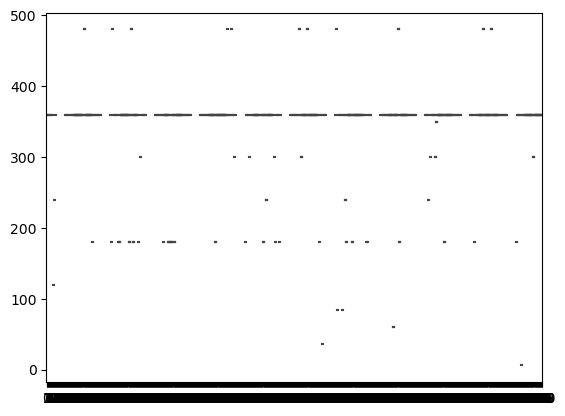

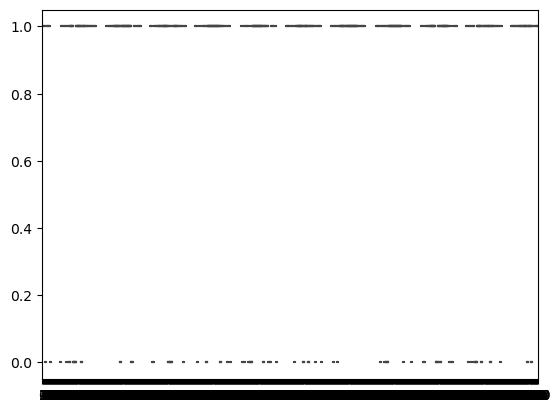

In [24]:

columns = [ 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' ]


def boxplot(col):
    sns.boxplot(data[col])
    plt.show()    

for i in columns:
    boxplot(i)

In [25]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [26]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [27]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [28]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

In [29]:
data = pd.get_dummies(data , columns = ['Gender' ,'Married' ,'Dependents',
                                        'Education' , 'Self_Employed' , 'Property_Area' ] , 
                      drop_first=True , dtype = float)

In [30]:
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,126.0,360.0,1.0,Y,train,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,train,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,train,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,train,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,train,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,4009,1777.0,113.0,360.0,1.0,NaN,test,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
363,LP002975,4158,709.0,115.0,360.0,1.0,NaN,test,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
364,LP002980,3250,1993.0,126.0,360.0,1.0,NaN,test,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
365,LP002986,5000,2393.0,158.0,360.0,1.0,NaN,test,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
train = data[data['data'] == 'train']
test = data[data['data'] == 'test']

In [32]:
train.shape , test.shape

((614, 17), (367, 17))

In [33]:
x = train.drop(['Loan_ID' , 'data' , 'Loan_Status'] , axis = 1)

y= train['Loan_Status']

In [34]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583,1508.0,128.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000,0.0,66.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000,0.0,141.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [36]:
test.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0.0,110.0,360.0,1.0,NaN,test,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,LP001022,3076,1500.0,126.0,360.0,1.0,NaN,test,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,LP001031,5000,1800.0,208.0,360.0,1.0,NaN,test,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,LP001035,2340,2546.0,100.0,360.0,1.0,NaN,test,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,LP001051,3276,0.0,78.0,360.0,1.0,NaN,test,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [37]:
test = test.drop(['Loan_ID' , 'data' , 'Loan_Status'] , axis = 1)


In [38]:
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.680782,342.410423,0.855049,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990
std,6109.041673,2926.248369,84.123205,64.428629,0.352339,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,126.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling 

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.859023,-1.000000,-0.661360,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-0.890340,-0.927617,-0.655572,0.487179,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.929499,-1.000000,-0.835022,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
3,-0.939814,-0.886817,-0.678726,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
4,-0.855288,-1.000000,-0.617945,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [40]:
test1 = scaler.transform(test)
pd.DataFrame(test1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.862214,-1.000000,-0.707670,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-0.927619,-0.928001,-0.661360,0.487179,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,-0.880025,-0.913601,-0.424023,0.487179,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,-0.945826,-0.877793,-0.736614,0.487179,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,-0.922672,-1.000000,-0.800289,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [41]:
y.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [42]:
y = np.where(y=='Y' , 1, 0)

In [43]:
y = pd.DataFrame(y)

In [44]:
y.value_counts()

1    422
0    192
Name: count, dtype: int64

In [45]:
# split the train data into training and testing

from sklearn.model_selection import train_test_split

x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state= 21 , stratify= y)

# Building Support Vector Machince


1) Kernel = 'Linear'
2) Kernel = 'Sigmoid'
3) Kernel = 'poly'
4) Kernel = 'rbf'
 

In [46]:
from sklearn.metrics import accuracy_score , classification_report

In [47]:

from sklearn.svm import SVC
# kernel = 'linear'

svc_l = SVC(kernel='linear')
svc_lr = svc_l.fit(x_train , y_train)
y_pred_train = svc_l.predict(x_train)
y_pred_test = svc_l.predict(x_test)
accuracy_score_lr_train = accuracy_score(y_train , y_pred_train)
accuracy_score_lr_test = accuracy_score(y_test , y_pred_test)

# kernel = 'sigmoid'

svc_s = SVC(kernel='sigmoid')
svc_sg = svc_s.fit(x_train , y_train)
y_pred_train = svc_s.predict(x_train)
y_pred_test = svc_s.predict(x_test)
accuracy_score_sg_train = accuracy_score(y_train , y_pred_train)
accuracy_score_sg_test = accuracy_score(y_test , y_pred_test)


# kernel = 'poly'

svc_p = SVC(kernel='poly')
svc_pl = svc_p.fit(x_train , y_train)
y_pred_train = svc_p.predict(x_train)
y_pred_test = svc_p.predict(x_test)
accuracy_score_pl_train = accuracy_score(y_train , y_pred_train)
accuracy_score_pl_test = accuracy_score(y_test , y_pred_test)


# kernel = 'rbf'

svc_r = SVC(kernel='rbf')
svc_rbf = svc_r.fit(x_train , y_train)
y_pred_train = svc_r.predict(x_train)
y_pred_test = svc_r.predict(x_test)
accuracy_score_rbf_train = accuracy_score(y_train , y_pred_train)
accuracy_score_rbf_test = accuracy_score(y_test , y_pred_test)



# Naive Bayes Theorem
# gaussianNB

from sklearn.naive_bayes import GaussianNB

# GaussianNB
gnb = GaussianNB()
gnb_1 = gnb.fit(x_train , y_train)
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)
accuracy_score_gnb_train = accuracy_score(y_train , y_pred_train)
accuracy_score_gnb_test = accuracy_score(y_test , y_pred_test)


# BernoliNB

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb = bnb.fit(x_train , y_train)
y_pred_train = bnb.predict(x_train)
y_pred_test = bnb.predict(x_test)
accuracy_score_bnb_train = accuracy_score(y_train , y_pred_train)
accuracy_score_bnb_test = accuracy_score(y_test , y_pred_test)

list1 = ['SVM_LINEAR' ,'SVM_SIGMOID' ,'SVM_POLY' , 'SVM_RBF' , 'GNB' , 'BNB']

list2 = [accuracy_score_lr_train , accuracy_score_sg_train , accuracy_score_pl_train, 
        accuracy_score_rbf_train, accuracy_score_gnb_train, accuracy_score_bnb_train
        ]

list3 = [accuracy_score_lr_test, accuracy_score_sg_test , 
         accuracy_score_pl_test, accuracy_score_rbf_test,
        accuracy_score_gnb_test, accuracy_score_bnb_test]


accuracy_train  = pd.DataFrame({'Method Used' : list1 , 'Accuracy' : list2} )
accuracy_test  = pd.DataFrame({'Method Used' : list1 , 'Accuracy' : list3} )






Axes(0.125,0.11;0.775x0.77)


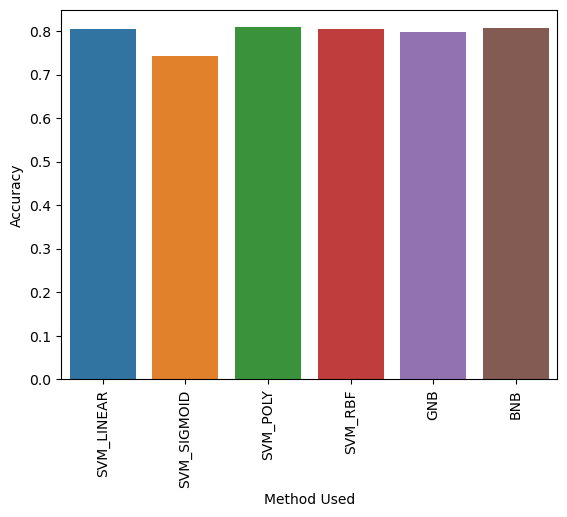

In [48]:
chart = sns.barplot(x = 'Method Used' , y = 'Accuracy' , data = accuracy_train)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
print(chart)

Axes(0.125,0.11;0.775x0.77)


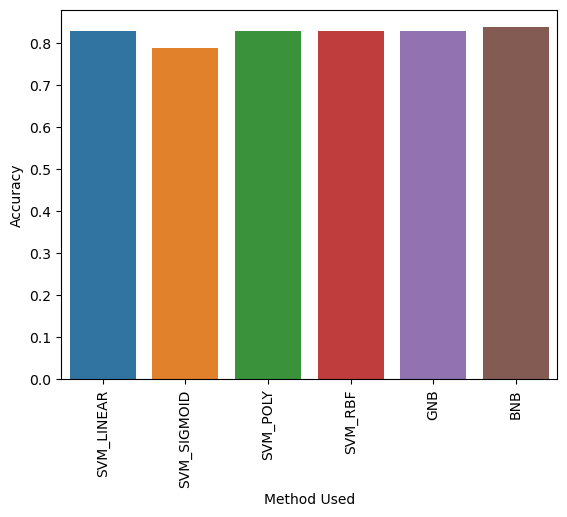

In [49]:
chart = sns.barplot(x = 'Method Used' , y = 'Accuracy' , data = accuracy_test)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
print(chart)

# Final model Support vector machine 

In [50]:
final_test = svc_r.predict(test1)
final_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [51]:
finall_out_test = pd.concat([test, pd.DataFrame(final_test)] , axis = 1)

In [52]:
finall_out_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,0
0,5720,0.0,110.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,3076,1500.0,126.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,5000,1800.0,208.0,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,2340,2546.0,100.0,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,3276,0.0,78.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1
363,4158,709.0,115.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
364,3250,1993.0,126.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
365,5000,2393.0,158.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [53]:
# finall_out_test.to_csv('finall_out_test')

# Principal Component Analysis (PCA) - Dimension Reduction

In [54]:
print(x_train.shape , x_test.shape)

(491, 14) (123, 14)


In [55]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_test)



In [57]:
print(x_train_n.shape , x_test_n.shape)

(491, 14) (123, 14)


In [59]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.944762,-0.839969,-0.528220,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,-0.917972,-0.835457,-0.591896,0.487179,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2,-0.814224,-1.000000,-0.725036,0.487179,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
3,-0.515646,-0.747234,0.623734,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-0.902412,-0.834545,-0.589001,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,-0.914632,-0.923681,-0.661360,0.487179,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
487,-0.927372,-1.000000,-0.678726,0.487179,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
488,-0.914657,-1.000000,-0.794501,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
489,-0.919357,-1.000000,-0.771346,0.487179,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [58]:
pd.DataFrame(x_train_n)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.302537,-0.721249,-0.568912,0.061585,0.067628,-0.499697,-0.202319,0.211187,-0.399971,-0.510952,-0.044893,0.011660,0.096724,-0.026824
1,-0.120591,-0.751955,-0.244128,-0.136179,1.162312,-0.984330,-0.279372,0.743788,0.871136,1.042123,-0.015036,-0.270886,0.117791,0.020448
2,-1.477542,-0.482645,1.741107,0.101590,0.631708,0.807143,-1.058718,0.061887,-0.645723,-0.729567,-0.134553,-0.025743,-0.140313,0.020980
3,-0.124281,-0.634566,-0.453733,-0.107216,0.532167,-0.690392,-0.032280,-0.105019,0.859246,-0.417918,-0.550165,1.104927,0.176456,-0.076000
4,-0.026052,1.066254,-0.219497,-0.495715,0.569941,-0.892576,0.387973,-0.776370,0.397476,-0.019066,-0.008985,0.025424,0.076696,0.021989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,-0.119051,-1.301935,1.532437,-1.125792,-0.803707,-0.041259,0.241273,-0.579780,0.832936,0.203274,-0.086915,-0.015976,-0.029720,0.012025
487,1.649330,1.819134,-0.532434,-0.274170,-0.583782,0.106459,-0.388835,0.427171,0.052276,0.004747,0.033049,-0.006699,-0.003507,-0.050495
488,-1.399250,1.221566,-0.386104,-0.390509,0.052100,-0.581129,0.119879,-0.268971,-0.773443,-0.013648,0.018481,-0.148782,-0.069378,-0.033946
489,-1.150808,2.104195,-0.519512,-0.361121,-0.711733,0.204161,-0.521646,0.579223,0.122635,0.000423,0.020054,-0.082008,-0.022776,-0.018425


In [60]:
# which all variables are significant after appliying pca method

In [61]:
explained_varience = pca.explained_variance_ratio_
explained_varience

array([0.23623441, 0.18173681, 0.12126603, 0.08665343, 0.08435966,
       0.0752672 , 0.05974978, 0.05744487, 0.04014826, 0.03497924,
       0.01112192, 0.00691223, 0.00353662, 0.00058955])

In [62]:
pca = PCA(n_components=9)
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_test)



In [64]:
svc_lr = svc_l.fit(x_train_n , y_train)
y_pred_train = svc_l.predict(x_train_n)
y_pred_test = svc_l.predict(x_test_n)
accuracy_score_lr_train = accuracy_score(y_train , y_pred_train)
accuracy_score_lr_test = accuracy_score(y_test , y_pred_test)


In [65]:
accuracy_score_lr_train

0.8044806517311609

In [66]:
accuracy_score_lr_test

0.7723577235772358